In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [71]:
df = pd.read_csv('HR_Analytics.csv')
df.head()

,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,RM297,18,18-25,Yes,Travel_Rarely,230,Research & Development,3,3,Life Sciences,...,3,80,0,0,2,3,0,0,0,0.0
1,RM302,18,18-25,No,Travel_Rarely,812,Sales,10,3,Medical,...,1,80,0,0,2,3,0,0,0,0.0
2,RM458,18,18-25,Yes,Travel_Frequently,1306,Sales,5,3,Marketing,...,4,80,0,0,3,3,0,0,0,0.0
3,RM728,18,18-25,No,Non-Travel,287,Research & Development,5,2,Life Sciences,...,4,80,0,0,2,3,0,0,0,0.0
4,RM829,18,18-25,Yes,Non-Travel,247,Research & Development,8,1,Medical,...,4,80,0,0,0,3,0,0,0,0.0


In [73]:
df.shape

(1480, 38)

In [75]:
df.columns

Index(['EmpID', 'Age', 'AgeGroup', 'Attrition', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'SalarySlab',
       'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmpID                     1480 non-null   object 
 1   Age                       1480 non-null   int64  
 2   AgeGroup                  1480 non-null   object 
 3   Attrition                 1480 non-null   object 
 4   BusinessTravel            1480 non-null   object 
 5   DailyRate                 1480 non-null   int64  
 6   Department                1480 non-null   object 
 7   DistanceFromHome          1480 non-null   int64  
 8   Education                 1480 non-null   int64  
 9   EducationField            1480 non-null   object 
 10  EmployeeCount             1480 non-null   int64  
 11  EmployeeNumber            1480 non-null   int64  
 12  EnvironmentSatisfaction   1480 non-null   int64  
 13  Gender                    1480 non-null   object 
 14  HourlyRa

In [79]:
df.describe(include='all')

,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1480,1480.000000,1480,1480,1480,1480.000000,1480,1480.000000,1480.000000,1480,...,1480.000000,1480.0,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1423.000000
unique,1470,NaN,5,2,4,NaN,3,NaN,NaN,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,RM1467,NaN,26-35,No,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2,NaN,611,1242,1042,NaN,967,NaN,NaN,607,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,36.917568,NaN,NaN,NaN,801.384459,NaN,9.220270,2.910811,NaN,...,2.708784,80.0,0.791892,11.281757,2.797973,2.760811,7.009459,4.228378,2.182432,4.118060
std,NaN,9.128559,NaN,NaN,NaN,403.126988,NaN,8.131201,1.023796,NaN,...,1.081995,0.0,0.850527,7.770870,1.288791,0.707024,6.117945,3.616020,3.219357,3.555484
min,NaN,18.000000,NaN,NaN,NaN,102.000000,NaN,1.000000,1.000000,NaN,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,30.000000,NaN,NaN,NaN,465.000000,NaN,2.000000,2.000000,NaN,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,NaN,36.000000,NaN,NaN,NaN,800.000000,NaN,7.000000,3.000000,NaN,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,NaN,43.000000,NaN,NaN,NaN,1157.000000,NaN,14.000000,4.000000,NaN,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000


In [81]:
df.isna().sum()

EmpID                        0
Age                          0
AgeGroup                     0
Attrition                    0
BusinessTravel               0
DailyRate                    0
Department                   0
DistanceFromHome             0
Education                    0
EducationField               0
EmployeeCount                0
EmployeeNumber               0
EnvironmentSatisfaction      0
Gender                       0
HourlyRate                   0
JobInvolvement               0
JobLevel                     0
JobRole                      0
JobSatisfaction              0
MaritalStatus                0
MonthlyIncome                0
SalarySlab                   0
MonthlyRate                  0
NumCompaniesWorked           0
Over18                       0
OverTime                     0
PercentSalaryHike            0
PerformanceRating            0
RelationshipSatisfaction     0
StandardHours                0
StockOptionLevel             0
TotalWorkingYears            0
Training

In [83]:
df['YearsWithCurrManager'].fillna(np.mean(df['YearsWithCurrManager']), inplace = True)

In [85]:
print(df.columns.tolist())

['EmpID', 'Age', 'AgeGroup', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'SalarySlab', 'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [87]:
# Checking whether the dataset is balanced or not
counts = df['Department'].value_counts()
counts

Department
Research & Development    967
Sales                     450
Human Resources            63
Name: count, dtype: int64

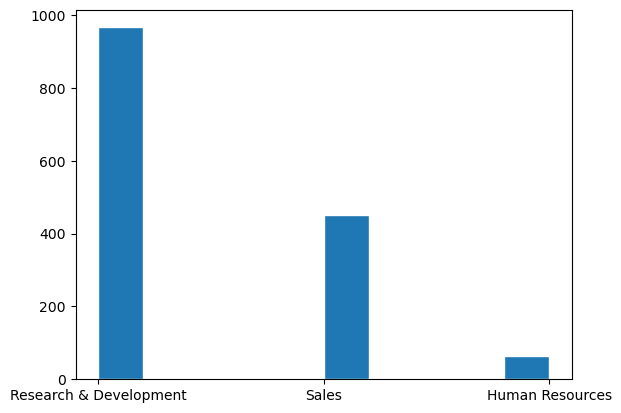

In [89]:
plt.hist(df.Department,edgecolor='white')
plt.show()

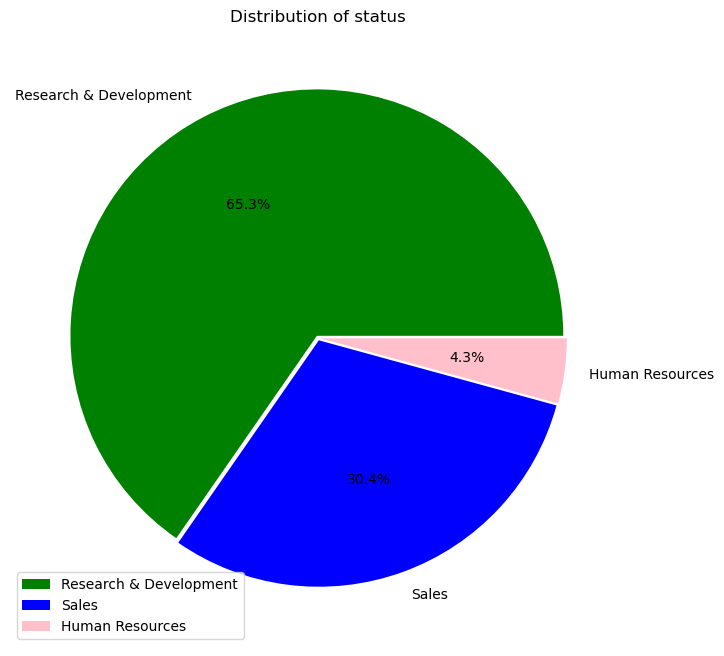

In [91]:
plt.figure(figsize=(18,8))
plt.pie(counts.values,labels=['Research & Development','Sales','Human Resources'],autopct='%0.1f%%', colors=['green','blue','pink'],explode=[0.01,0.01,0.01])
plt.title('Distribution of status')
plt.legend()
plt.show()

In [93]:
counts = df['Attrition'].value_counts()
counts

Attrition
No     1242
Yes     238
Name: count, dtype: int64

In [99]:
encode = LabelEncoder()
df['EmpID'] = encode.fit_transform(df['EmpID'])
df['AgeGroup'] = encode.fit_transform(df['AgeGroup'])
df['Attrition'] = encode.fit_transform(df['Attrition'])
df['BusinessTravel'] = encode.fit_transform(df['BusinessTravel'])
df['Department'] = encode.fit_transform(df['Department'])
df['EducationField'] = encode.fit_transform(df['EducationField'])
df['Gender'] = encode.fit_transform(df['Gender'])
df['JobRole'] = encode.fit_transform(df['JobRole'])
df['MaritalStatus'] = encode.fit_transform(df['MaritalStatus'])
df['SalarySlab'] = encode.fit_transform(df['SalarySlab'])
df['Over18'] = encode.fit_transform(df['Over18'])
df['OverTime'] = encode.fit_transform(df['OverTime'])

In [123]:
X = df.drop('Attrition', axis=1)
y = df.Attrition

x_tr, x_ts, y_tr, y_ts = train_test_split(X, y, test_size=0.2, random_state= 24)

In [125]:
print(f'Train: {x_tr.shape}, {y_tr.shape} ')
print(f'Test: {x_ts.shape}, {y_ts.shape}')

Train: (1184, 37), (1184,) 
Test: (296, 37), (296,)


In [127]:
model = DecisionTreeClassifier(max_depth=4)
model.fit(x_tr,y_tr)
y_pr = model.predict(x_ts)
accuracy_score(y_ts,y_pr)*100

83.78378378378379

In [129]:
model = RandomForestClassifier(max_depth=3)
model.fit(x_tr,y_tr)
y_pred = model.predict(x_ts)
accuracy_score(y_ts,y_pred)*100

84.45945945945947

In [131]:
model = SVC()
model.fit(x_tr,y_tr)
y_pred = model.predict(x_ts)
accuracy_score(y_ts,y_pred)*100

83.44594594594594